In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = sns.load_dataset('anscombe')


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [4]:
df


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


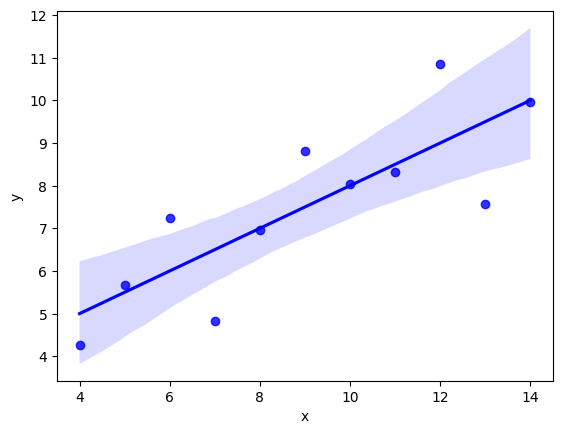

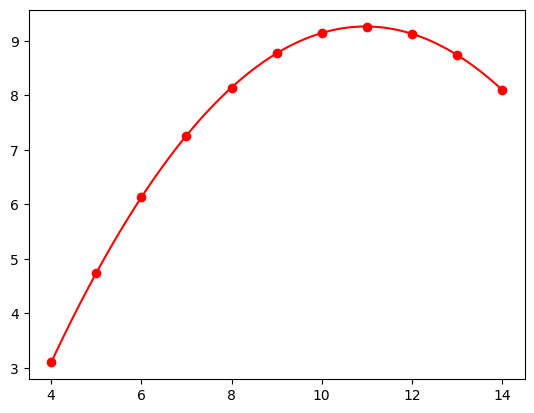

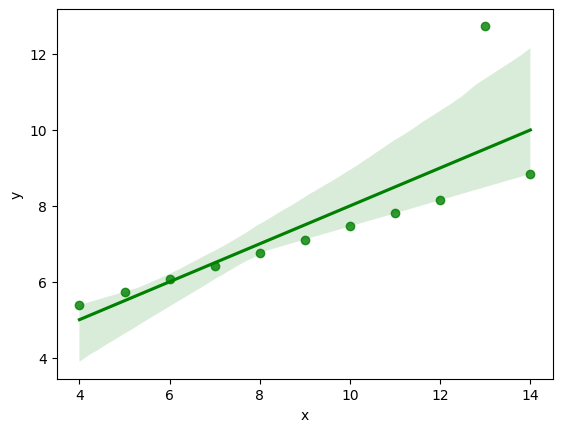

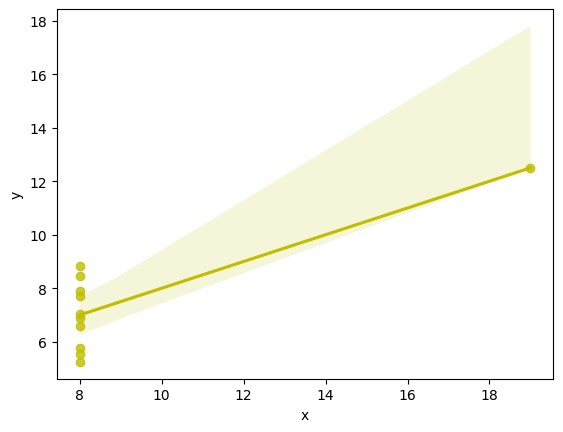

In [5]:
for dataset, color in zip(('I', 'II', 'III', 'IV'), ('b', 'r', 'g', 'y')):
    if dataset == 'II':
        x = df[df['dataset'] == dataset]['x']
        y = df[df['dataset'] == dataset]['y']

        model = np.poly1d(np.polyfit(x, y, 2))
        polyline = np.linspace(4, 14, 100)

        plt.scatter(x, y, color=color)
        plt.plot(polyline, model(polyline), color=color)

    else:
        sns.regplot(x='x', y='y', data=df[df['dataset'] == dataset], color=color)

    plt.show()


In [6]:
df.groupby('dataset').agg(['mean', 'var'])


x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

Dane dla 4 wykresów są różne, jednak mają one praktycznie takie same średnią oraz wariancję.
Widać również, że dla wykresów I, III oraz IV wykresy powstałe z regresji liniowej są takie same.
